In [ ]:
import random
from PIL import Image, ImageDraw


def generate_image(output_path, size=(400, 400)):

    image = Image.new('RGB', size, color='white')
    draw = ImageDraw.Draw(image)

    start = (random.randint(0, size[0]), random.randint(0, size[1]))
    end = (random.randint(0, size[0]), random.randint(0, size[1]))

    draw.line([start, end], fill='black', width=2)

    image.save(output_path)


generate_image('./temp.png')

In [ ]:
import imagej
import numpy as np
from scyjava import jimport

In [ ]:
ij = imagej.init(['net.imagej:imagej:2.1.0'], headless=True)

image_path = "./temp.png"

In [ ]:
ij_image = ij.io().open(image_path)

In [ ]:
ij.IJ.run(ij_image_plus, "8-bit", "")

# Threshold the image to binary
ij.IJ.setAutoThreshold(ij_image_plus, "Default dark")
ij.IJ.run(ij_image_plus, "Convert to Mask", "")

# Analyze particles to find the length of the black line
ResultsTable = jimport('ij.measure.ResultsTable')
ParticleAnalyzer = jimport('ij.plugin.filter.ParticleAnalyzer')
Measurements = jimport('ij.measure.Measurements')

rt = ResultsTable()
options = ParticleAnalyzer.SHOW_RESULTS | ParticleAnalyzer.DISPLAY_SUMMARY
measurements = Measurements.AREA | Measurements.PERIMETER | Measurements.FERET
pa = ParticleAnalyzer(options, measurements, rt, 0, float('inf'))
pa.analyze(ij_image_plus)

# Find the maximum length from the results
feret_column = rt.getColumn("Feret")
if feret_column is None:
    raise ValueError("Feret diameter not found in results table.")
line_length = max(feret_column)

print(f'The length of the black line is: {line_length:.2f} pixels')

In [1]:
import imagej
import numpy as np

ij = imagej.init('sc.fiji:fiji')

In [2]:
img = ij.io().open('./temp.png')

In [5]:
img_8bit = ij.op().convert().uint8(img)

In [7]:

# Convert to ImagePlus
imp = ij.py.to_imageplus(img_8bit)

# Apply thresholding using ImageJ's built-in method
ij.IJ.setAutoThreshold(imp, "Default dark")
ij.IJ.run(imp, "Convert to Mask", "")

# Get the binary image as a numpy array
binary_np = ij.py.from_java(imp.getProcessor().getPixels())
binary_np = binary_np.reshape(imp.getHeight(), imp.getWidth())

# Find the coordinates of non-zero pixels (the line)
y_coords, x_coords = np.nonzero(binary_np)

Operating in headless mode - the IJ class will not be fully functional.


In [8]:

# Calculate the length of the line
if len(x_coords) > 1:
    # Calculate distances between consecutive points
    distances = np.sqrt(np.diff(x_coords)**2 + np.diff(y_coords)**2)

    # Sum up the distances to get the total length
    line_length = np.sum(distances)

    print(f"The length of the line is approximately {line_length:.2f} pixels.")
else:
    print("No line detected in the image.")

The length of the line is approximately 318801.50 pixels.


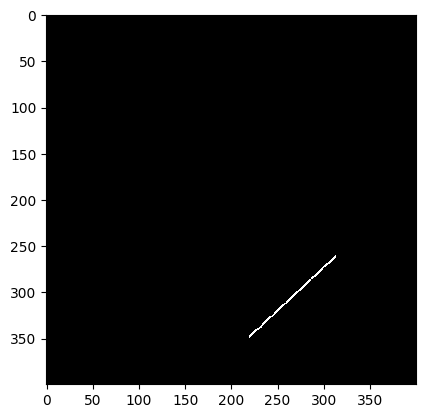

In [9]:

# Display the binary image for verification
ij.py.show(binary_np, cmap='gray')

In [11]:
!pip install scipy

The slope of the line is approximately -0.0008
The angle of the line with respect to the horizontal is approximately -0.05 degrees


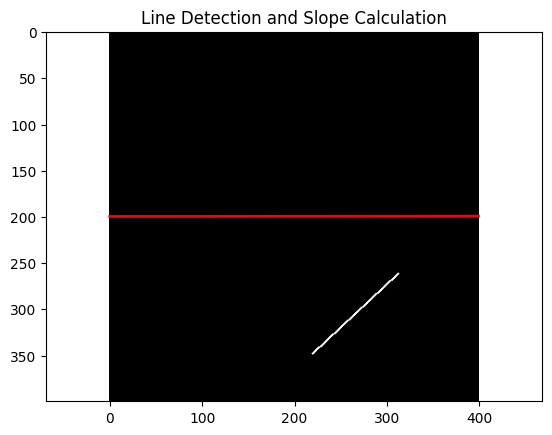

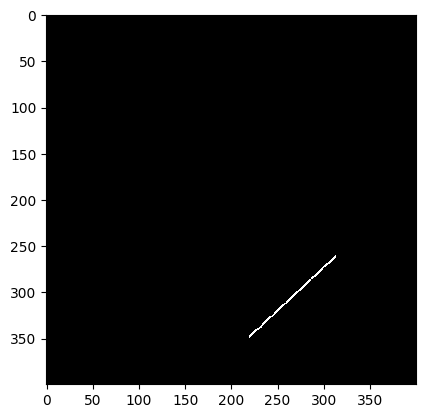

In [12]:
from scipy import stats

img = ij.io().open('./temp.png')

# Convert to 8-bit grayscale if it's not already
img_8bit = ij.op().convert().uint8(img)

# Convert to ImagePlus
imp = ij.py.to_imageplus(img_8bit)

# Apply thresholding using ImageJ's built-in method
ij.IJ.setAutoThreshold(imp, "Default dark")
ij.IJ.run(imp, "Convert to Mask", "")

# Get the binary image as a numpy array
binary_np = ij.py.from_java(imp.getProcessor().getPixels())
binary_np = binary_np.reshape(imp.getHeight(), imp.getWidth())

# Find the coordinates of non-zero pixels (the line)
y_coords, x_coords = np.nonzero(binary_np)

# Calculate the slope of the line
if len(x_coords) > 1:
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(
        x_coords, y_coords)

    # Calculate angle in degrees
    angle = np.arctan(slope) * 180 / np.pi

    print(f"The slope of the line is approximately {slope:.4f}")
    print(f"The angle of the line with respect to the horizontal is approximately {
          angle:.2f} degrees")

    # Plot the results
    import matplotlib.pyplot as plt
    plt.imshow(binary_np, cmap='gray')
    plt.plot(x_coords, slope * x_coords + intercept, color='red', linewidth=2)
    plt.title('Line Detection and Slope Calculation')
    plt.axis('equal')
    plt.show()
else:
    print("No line detected in the image.")

# Display the binary image for verification
ij.py.show(binary_np, cmap='gray')